In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
import numpy as np

import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('big_mart_train.csv')

In [3]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

___

There are quite a few missing values for item weight.  The solution will be to create a table grouped by item_identifier to reference for missing values. 

In [5]:
lookup_weight_values = data.iloc[:,0:2].groupby(by='Item_Identifier').max()

In [6]:
imputed_data = data

In [7]:
imputed_data = imputed_data.merge(lookup_weight_values,on='Item_Identifier')

In [8]:
imputed_data = imputed_data.drop(columns=['Item_Weight_x'])

In [9]:
imputed_data.rename(columns={'Item_Weight_y': 'Item_Weight'}, inplace=True)

---
### Outlet Size Results

I chose these manually because of the low number of cases to model.  There is a better method I'm sure, but this is quick and should be close enough for the time being. 

* Outlet 10 Medium....only 1 other grocery store.  Both are similar and the other is Medium.
* Outlet 17 small...less sales than OUTO35(small)
* Outlet 45 small...lowest sales for Tier 2 Supermarket Type1

In [10]:
#total sales by Outlet_Identifier
round(imputed_data.groupby('Outlet_Identifier')["Item_Outlet_Sales"].sum(),2)

Outlet_Identifier
OUT010     188340.17
OUT013    2142663.58
OUT017    2167465.29
OUT018    1851822.83
OUT019     179694.09
OUT027    3453926.05
OUT035    2268122.94
OUT045    2036725.48
OUT046    2118395.17
OUT049    2183969.81
Name: Item_Outlet_Sales, dtype: float64

In [11]:
#sales by outlet_size
round(imputed_data.groupby(['Outlet_Size', 'Outlet_Identifier'])['Item_Outlet_Sales'].sum(),2)

Outlet_Size  Outlet_Identifier
High         OUT013               2142663.58
Medium       OUT018               1851822.83
             OUT027               3453926.05
             OUT049               2183969.81
Small        OUT019                179694.09
             OUT035               2268122.94
             OUT046               2118395.17
Name: Item_Outlet_Sales, dtype: float64

In [12]:
#by location_type
round(imputed_data.groupby(['Outlet_Location_Type','Outlet_Identifier'])["Item_Outlet_Sales"].sum(),2)

Outlet_Location_Type  Outlet_Identifier
Tier 1                OUT019                179694.09
                      OUT046               2118395.17
                      OUT049               2183969.81
Tier 2                OUT017               2167465.29
                      OUT035               2268122.94
                      OUT045               2036725.48
Tier 3                OUT010                188340.17
                      OUT013               2142663.58
                      OUT018               1851822.83
                      OUT027               3453926.05
Name: Item_Outlet_Sales, dtype: float64

In [13]:
#by outlet_type
round(imputed_data.groupby(['Outlet_Type','Outlet_Identifier'])["Item_Outlet_Sales"].sum(),2)

Outlet_Type        Outlet_Identifier
Grocery Store      OUT010                188340.17
                   OUT019                179694.09
Supermarket Type1  OUT013               2142663.58
                   OUT017               2167465.29
                   OUT035               2268122.94
                   OUT045               2036725.48
                   OUT046               2118395.17
                   OUT049               2183969.81
Supermarket Type2  OUT018               1851822.83
Supermarket Type3  OUT027               3453926.05
Name: Item_Outlet_Sales, dtype: float64

In [14]:
#Need to impute OUT010, OUT017, OUT045
imputed_data.groupby('Outlet_Identifier')['Outlet_Size'].max()

Outlet_Identifier
OUT010       NaN
OUT013      High
OUT017       NaN
OUT018    Medium
OUT019     Small
OUT027    Medium
OUT035     Small
OUT045       NaN
OUT046     Small
OUT049    Medium
Name: Outlet_Size, dtype: object

In [15]:
imputed_data.loc[imputed_data['Outlet_Identifier'] == 'OUT017']

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight
7,FDA15,LF,0.016113,Dairy,248.8092,OUT017,2007,NaN,Tier 2,Supermarket Type1,5976.2208,9.300
9,DRC01,Regular,0.019309,Soft Drinks,49.0692,OUT017,2007,NaN,Tier 2,Supermarket Type1,1478.0760,5.920
31,NCD19,Low Fat,0.013254,Household,56.4614,OUT017,2007,NaN,Tier 2,Supermarket Type1,828.9210,8.930
34,FDP36,Regular,0.091688,Baking Goods,49.0008,OUT017,2007,NaN,Tier 2,Supermarket Type1,860.2136,10.395
41,FDO10,Regular,0.012824,Snack Foods,55.5588,OUT017,2007,NaN,Tier 2,Supermarket Type1,916.1408,13.650
46,FDP10,Low Fat,0.128815,Snack Foods,107.6622,OUT017,2007,NaN,Tier 2,Supermarket Type1,1164.4842,19.000
52,FDH17,Regular,0.016748,Frozen Foods,98.6726,OUT017,2007,NaN,Tier 2,Supermarket Type1,1272.3438,16.200
58,FDU28,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,19.200
66,FDY07,Low Fat,0.122290,Fruits and Vegetables,46.3402,OUT017,2007,NaN,Tier 2,Supermarket Type1,275.6412,11.800
79,FDX32,Regular,0.100423,Fruits and Vegetables,144.7786,OUT017,2007,NaN,Tier 2,Supermarket Type1,2600.6148,15.100


In [16]:
imputed_data['Outlet_Size'] = np.where(imputed_data['Outlet_Identifier'] == "OUT010", 
         "Medium", imputed_data['Outlet_Size'])

In [17]:
imputed_data['Outlet_Size'] = np.where(imputed_data['Outlet_Identifier'] == "OUT017", 
         "Small", imputed_data['Outlet_Size'])

In [18]:
imputed_data['Outlet_Size'] = np.where(imputed_data['Outlet_Identifier'] == "OUT049", 
         "Small", imputed_data['Outlet_Size'])

---
* Drop cases with missing weights...should be 4

In [19]:
# 4 missing values
imputed_data.isnull().sum()

Item_Identifier                0
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  929
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
Item_Weight                    4
dtype: int64

In [20]:
#only rows with missing values
imputed_data[imputed_data['Item_Weight'].isnull()]

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight
4125,FDN52,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564,NaN
6440,FDK57,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280,NaN
8278,FDE52,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046,NaN
8463,FDQ60,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098,NaN


In [21]:
# drop rows with missing values (only 4 in this case)
imputed_data = imputed_data.dropna()

___

* Drop Item_Identifier
* Encode dummy variables
* Split lable from data

In [22]:
#item identifier isn't useful in this context
imputed_data = imputed_data.drop('Item_Identifier', axis='columns')

In [23]:
#encode non_numeric types to their own column with binary values
data_encoded = pd.get_dummies(imputed_data)

In [24]:
data_label = data_encoded.pop('Item_Outlet_Sales')

In [25]:
#add the label to the end of the DF
data_encoded['Item_Outlet_Sales'] = data_label

___

### Prepare to model

* Create x & y 
* Split data into train / test

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X, y = data_encoded.iloc[:,:-1],data_encoded.iloc[:,-1]

In [28]:
seed = 7
test_size = 0.33
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

___

### XGBoost

In [29]:
import xgboost as xgb

In [30]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [31]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear')

In [32]:
xgb_model = xg_reg.fit(x_train,y_train)
y_xgb = xgb_model.predict(x_test)

___

### SVM
[docs](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html#sphx-glr-auto-examples-svm-plot-svm-regression-py)

In [33]:
from sklearn.svm import SVR

In [34]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
rbf_model = svr_rbf.fit(x_train, y_train)
y_rbf = rbf_model.predict(x_test)

In [35]:
svr_lin = SVR(kernel='linear', C=1e3)
linear_model = svr_lin.fit(x_train, y_train)
y_lin = linear_model.predict(x_test)

In [36]:
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
poly_model = svr_poly.fit(x_train, y_train)
y_poly = poly_model.predict(x_test)

/Users/justinbarker/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


---

### Evaluate Models

1. y_xgb
2. y_rbf
3. y_lin
4. y_poly

In [37]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from numpy import sqrt

___

XGBoost

In [38]:
r2_score(y_test, y_xgb)

0.604516016359085

In [39]:
sqrt(mean_squared_error(y_test, y_xgb))

1113.3494139058182

___

RBF

[docs](https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html)

In [40]:
r2_score(y_test, y_rbf)

0.4017523759116606

In [41]:
sqrt(mean_squared_error(y_test, y_rbf))

1369.3281177798103

___

Linear

In [42]:
r2_score(y_test, y_lin)

0.35220109537046984

In [43]:
sqrt(mean_squared_error(y_test, y_lin))

1424.9090324497524

___

Polyonmial

In [44]:
r2_score(y_test, y_poly)

-616634.9861648617

In [45]:
sqrt(mean_squared_error(y_test, y_poly))

1390213.3921508098

___
Plot Results

In [46]:
import matplotlib.pyplot as plt

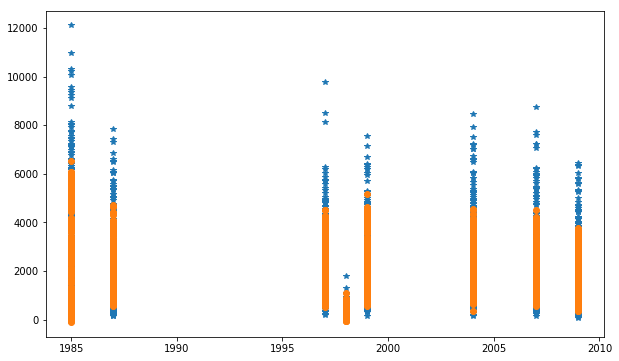

In [47]:
plt.figure(figsize=(10,6))
plt.plot(x_test['Outlet_Establishment_Year'], y_test, '*',
        x_test['Outlet_Establishment_Year'], y_xgb, 'o')

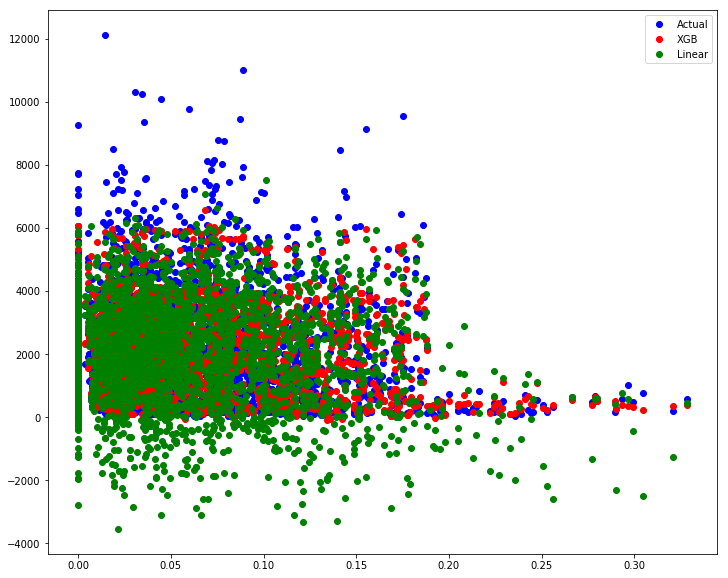

In [49]:
plt.figure(figsize=(12,10))
plt.plot(x_test['Item_Visibility'], y_test, 'o', color='b', label='Actual')
plt.plot(x_test['Item_Visibility'], y_xgb, 'o', color='r', label='XGB')
plt.plot(x_test['Item_Visibility'], y_lin, 'o', color='g', label='Linear')
plt.legend()

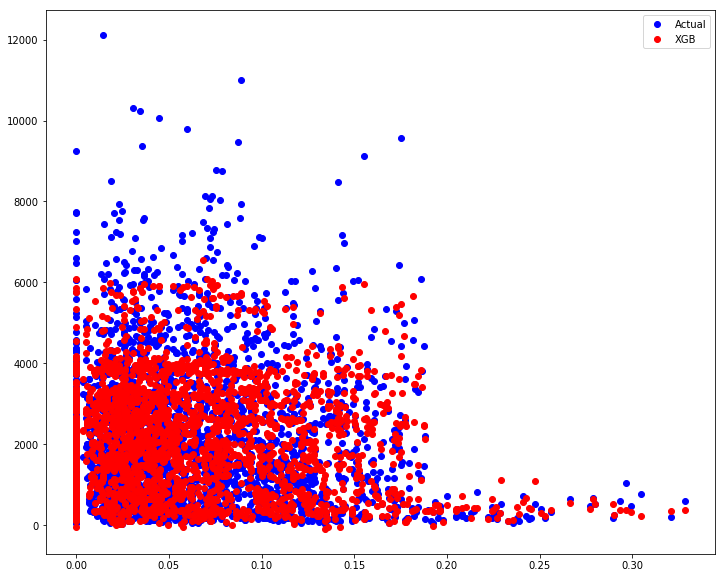

In [51]:
plt.figure(figsize=(12,10))
plt.plot(x_test['Item_Visibility'], y_test, 'o', color='b', label='Actual')
plt.plot(x_test['Item_Visibility'], y_xgb, 'o', color='r', label='XGB')
plt.legend()